In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2,1))
print(x)

x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.random.normal(shape=(3,1), mean=0, stddev = 1)
print(x)

x = tf.random.uniform(shape=(3,1), minval=0, maxval=1)
print(x)

tf.Tensor(
[[-0.4034152 ]
 [-0.6007031 ]
 [-0.26444912]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.85880256]
 [0.06758451]
 [0.7593204 ]], shape=(3, 1), dtype=float32)


In [4]:
v = tf.Variable(initial_value= tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.6310776 ],
       [ 0.8214692 ],
       [ 0.57845175]], dtype=float32)>


In [5]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [6]:
v[0,0].assign(3)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
print(v.assign_add(v))
print(v.assign_add(tf.ones((3,1))))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[6.],
       [2.],
       [2.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[7.],
       [3.],
       [3.]], dtype=float32)>


In [8]:
a = tf.random.uniform(shape=(2,2), minval=0, maxval=1)
print('Random unifrom intialization of a (2*2) matrix')
print(a)
b = tf.square(a)
print('')
print('Squaring the matrix')
print(b)
c = tf.sqrt(a)
print('')
print('Square root of the matrix')
print(c)
d = b * c
print('')
print('Squared values of a * Square root values of a - Element wise')
print(d)
e = tf.matmul(b,c)
print('')
print('Dot product of the same above')
print(e)

Random unifrom intialization of a (2*2) matrix
tf.Tensor(
[[0.629866   0.10997927]
 [0.6791637  0.81816995]], shape=(2, 2), dtype=float32)

Squaring the matrix
tf.Tensor(
[[0.3967312  0.01209544]
 [0.46126333 0.66940206]], shape=(2, 2), dtype=float32)

Square root of the matrix
tf.Tensor(
[[0.793641   0.33163124]
 [0.8241139  0.9045275 ]], shape=(2, 2), dtype=float32)

Squared values of a * Square root values of a - Element wise
tf.Tensor(
[[0.31486213 0.00401123]
 [0.3801335  0.6054926 ]], shape=(2, 2), dtype=float32)

Dot product of the same above
tf.Tensor(
[[0.32483014 0.14250912]
 [0.91774106 0.75846195]], shape=(2, 2), dtype=float32)


In [9]:
initial_value = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(initial_value) # <- TensorFlow remembers this is x^2
gradient = tape.gradient(result, initial_value)  # <- TensorFlow computes 2 * x

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [10]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(initial_value)
gradient = tape.gradient(result, initial_value)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [11]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(position)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


# Building a Linear Classifier

In [41]:
import numpy as np

num_samples_per_class = 1000
negative_class = np.random.multivariate_normal(
    mean = [0, 3],
    cov  = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)
positive_class = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)

print(f'Negative class shape : {negative_class.shape}')
print(f'\nNegative class first row sample : {negative_class[0]}')
print(f'\nPostive class shape : {positive_class.shape}')
print(f'\nPostive class first row sample : {positive_class[0]}')


Negative class shape : (1000, 2)

Negative class first row sample : [0.36844731 4.08671057]

Postive class shape : (1000, 2)

Postive class first row sample : [3.85650198 0.49905672]


In [42]:
inputs = np.vstack((negative_class, positive_class)).astype('float32')
print(f'Inputs shape: {inputs.shape}')
print(f'\nInputs first row sample: {inputs[0]}')

Inputs shape: (2000, 2)

Inputs first row sample: [0.3684473 4.0867105]


In [43]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = 'float32'),
                     np.ones((num_samples_per_class, 1), dtype = 'float32')))
print(f'Targets shape: {targets.shape}')
print(f'\nTargets first row sample: {targets[0]}')

Targets shape: (2000, 1)

Targets first row sample: [0.]


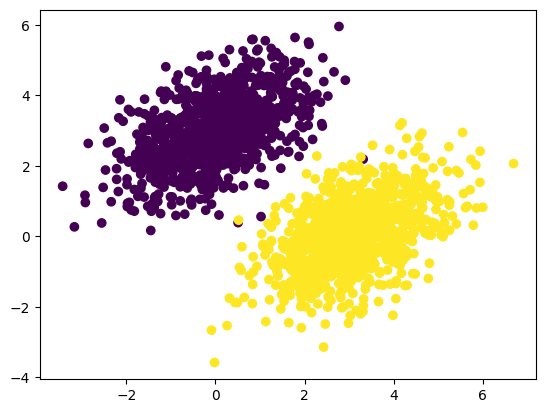

In [44]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [45]:
input_shape  = 2
output_shape = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_shape, output_shape)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_shape,)))

print(f'Initial weights are:\n {W}')
print(f'\nInitial biases are:\n {b}')

Initial weights are:
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.5746418 ],
       [0.11094522]], dtype=float32)>

Initial biases are:
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [46]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [47]:
def square_loss(targets, predictions):
  per_sample_loss = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_loss)

In [48]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  gradient_wrt_W, gradient_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(gradient_wrt_W * learning_rate)
  b.assign_sub(gradient_wrt_b * learning_rate)
  return loss

In [49]:
for i in range(1, 41):
  loss = training_step(inputs, targets)
  print(f'Loss at step {i} : {loss:.4f}')

Loss at step 1 : 0.7622
Loss at step 2 : 0.1938
Loss at step 3 : 0.1106
Loss at step 4 : 0.0931
Loss at step 5 : 0.0858
Loss at step 6 : 0.0806
Loss at step 7 : 0.0759
Loss at step 8 : 0.0717
Loss at step 9 : 0.0678
Loss at step 10 : 0.0642
Loss at step 11 : 0.0609
Loss at step 12 : 0.0579
Loss at step 13 : 0.0552
Loss at step 14 : 0.0527
Loss at step 15 : 0.0504
Loss at step 16 : 0.0482
Loss at step 17 : 0.0463
Loss at step 18 : 0.0445
Loss at step 19 : 0.0429
Loss at step 20 : 0.0414
Loss at step 21 : 0.0400
Loss at step 22 : 0.0387
Loss at step 23 : 0.0376
Loss at step 24 : 0.0365
Loss at step 25 : 0.0356
Loss at step 26 : 0.0347
Loss at step 27 : 0.0339
Loss at step 28 : 0.0331
Loss at step 29 : 0.0324
Loss at step 30 : 0.0318
Loss at step 31 : 0.0312
Loss at step 32 : 0.0307
Loss at step 33 : 0.0302
Loss at step 34 : 0.0297
Loss at step 35 : 0.0293
Loss at step 36 : 0.0290
Loss at step 37 : 0.0286
Loss at step 38 : 0.0283
Loss at step 39 : 0.0280
Loss at step 40 : 0.0277


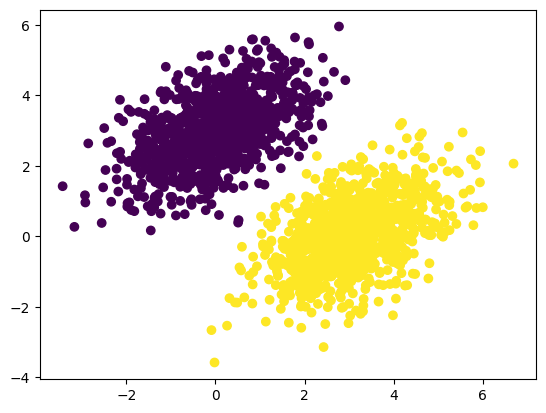

In [50]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

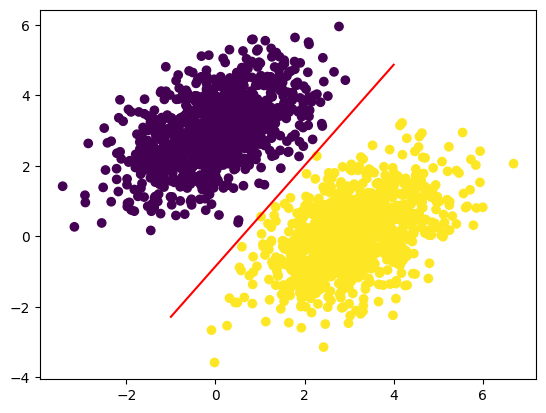

In [62]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:,0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()